In [17]:
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np

In [18]:
df = pd.read_csv('insulin_dosage_prediction.csv') 
df

,patient_id,gender,age,family_history,glucose_level,physical_activity,food_intake,previous_medications,BMI,HbA1c,weight,insulin_sensitivity,sleep_hours,creatinine,Insulin
0,1,male,68,yes,103.49,9.28,high,none,33.87,7.42,54.77,1.49,6.07,0.63,steady
1,2,female,57,yes,113.35,6.67,high,insulin,19.10,11.66,114.93,1.35,8.60,1.08,up
2,3,male,24,yes,127.40,4.14,medium,oral,22.48,5.72,59.07,0.96,5.19,1.36,up
3,4,male,49,yes,138.79,6.80,medium,oral,31.67,11.91,50.81,0.61,4.79,1.23,up
4,5,male,65,no,128.42,4.01,low,insulin,28.50,5.72,65.95,1.16,7.68,0.62,steady
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,female,33,no,193.35,6.40,high,none,29.20,4.74,61.66,1.33,6.18,0.58,no
9996,9997,male,77,yes,140.01,2.28,low,none,34.41,4.93,66.62,0.84,6.74,0.74,up
9997,9998,female,71,yes,190.90,8.53,medium,oral,26.82,9.64,76.26,1.47,9.71,0.67,steady
9998,9999,female,33,yes,164.27,7.50,high,none,29.82,9.34,94.50,1.04,8.49,0.96,no


In [19]:
df

patient_id              0
gender                  0
age                     0
family_history          0
glucose_level           0
physical_activity       0
food_intake             0
previous_medications    0
BMI                     0
HbA1c                   0
weight                  0
insulin_sensitivity     0
sleep_hours             0
creatinine              0
Insulin                 0
dtype: int64

In [25]:
df.duplicated().sum()

0

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   patient_id            10000 non-null  int64  
 1   gender                10000 non-null  object 
 2   age                   10000 non-null  int64  
 3   family_history        10000 non-null  object 
 4   glucose_level         10000 non-null  float64
 5   physical_activity     10000 non-null  float64
 6   food_intake           10000 non-null  object 
 7   previous_medications  10000 non-null  object 
 8   BMI                   10000 non-null  float64
 9   HbA1c                 10000 non-null  float64
 10  weight                10000 non-null  float64
 11  insulin_sensitivity   10000 non-null  float64
 12  sleep_hours           10000 non-null  float64
 13  creatinine            10000 non-null  float64
 14  Insulin               10000 non-null  object 
dtypes: float64(8), int64

In [23]:
# for col in df.columns: 
#     print(col)
#     print(np.sort(df[col].unique()))

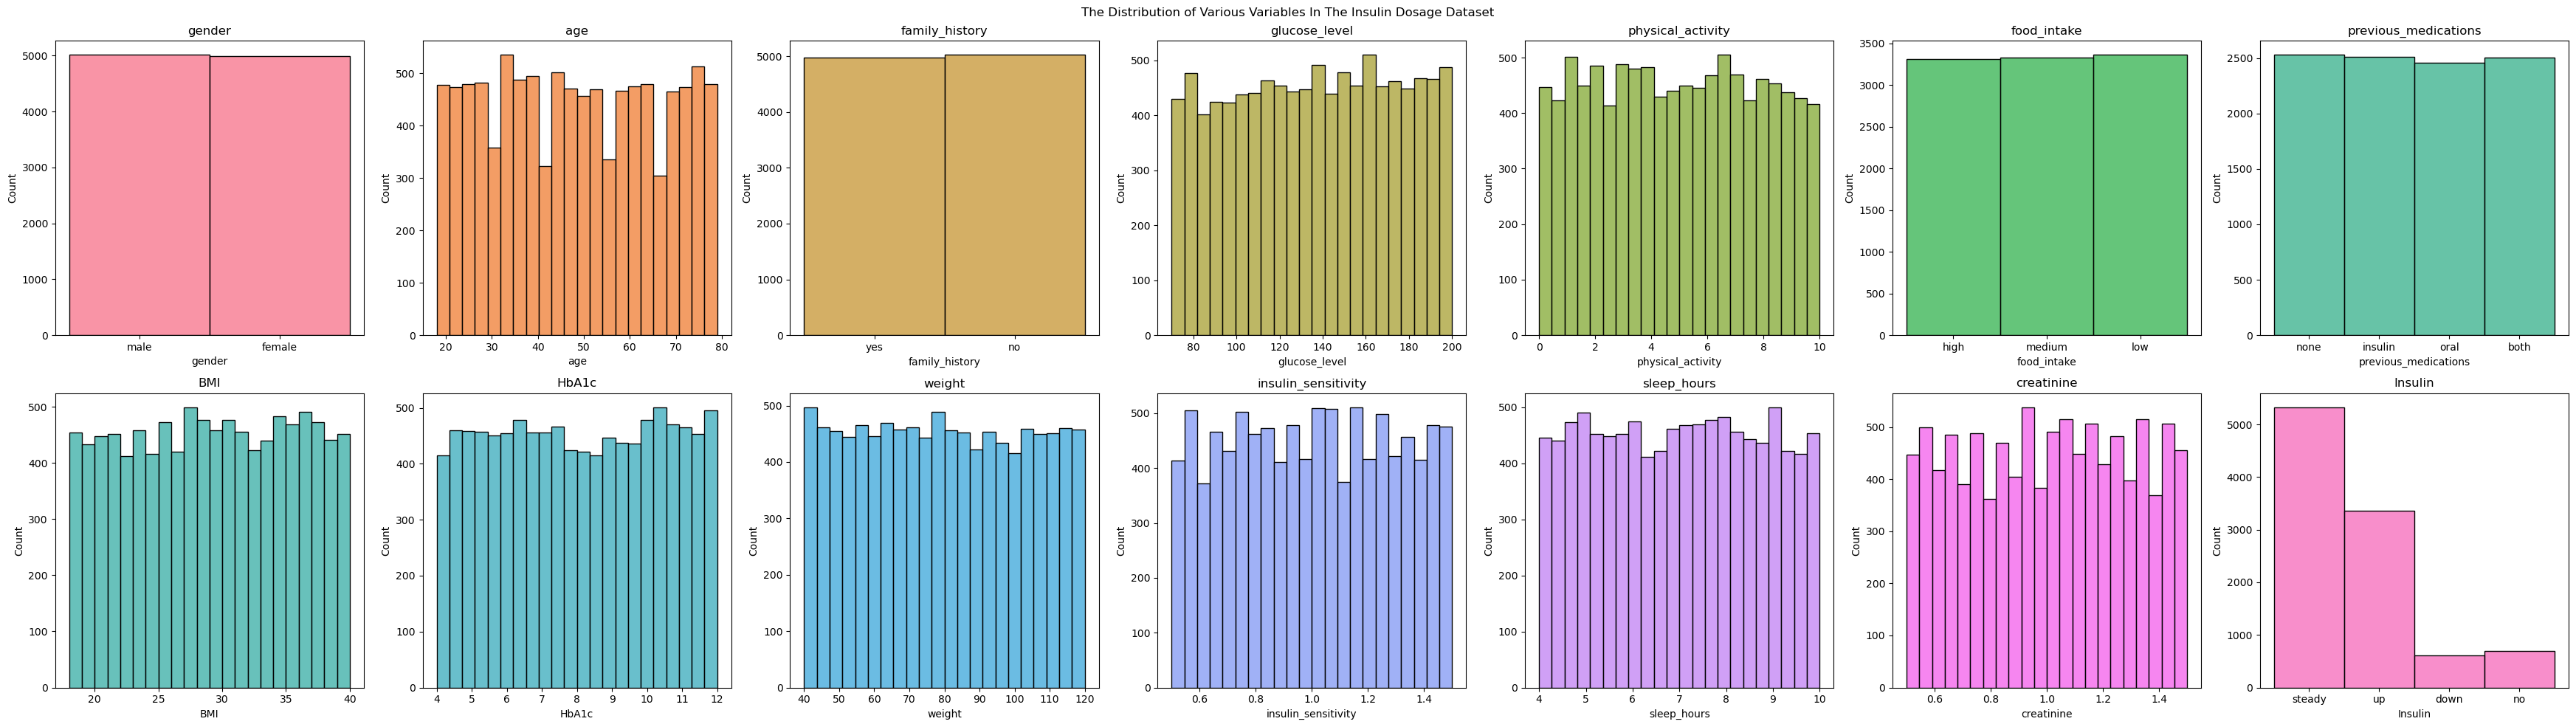

In [44]:
fig, ax = plt.subplots(2, 7, figsize=(35,10))

colours = sns.color_palette("husl", 14)

for i, col in enumerate(df.columns[1:]):
    sns.histplot(df[col], ax=ax[i//7, i%7], color=colours[i])
    ax[i//7, i%7].set_title(col)

plt.suptitle("The Distribution of Various Variables In The Insulin Dosage Dataset")
plt.tight_layout()
plt.show()